### lineplot: Seaborn

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("dataset.csv")

# df = pd.read_csv("dataset.csv", parse_dates=[3]) convert the third column to datestime

In [3]:
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [4]:
df.dtypes

SystemCodeNumber    object
Capacity             int64
Occupancy            int64
LastUpdated         object
dtype: object

In [5]:
df["LastUpdated"] = pd.to_datetime(df["LastUpdated"])

In [6]:
df = df.rename(columns={"SystemCodeNumber": "Location", "LastUpdated": "Timestamp"})

df["Day"] = df.Timestamp.dt.date
df["Month"] = df.Timestamp.dt.month
df["Hour"] = df.Timestamp.dt.hour

In [7]:
df.dtypes

Location             object
Capacity              int64
Occupancy             int64
Timestamp    datetime64[ns]
Day                  object
Month                 int32
Hour                  int32
dtype: object

In [8]:
df.head()

,Location,Capacity,Occupancy,Timestamp,Day,Month,Hour
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,2016-10-04,10,7
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,2016-10-04,10,8
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,2016-10-04,10,8
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,2016-10-04,10,9
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,2016-10-04,10,9


In [9]:
park = df[df["Location"].isin(["Broad Street", "NIA South"])]

In [10]:
park.head()

,Location,Capacity,Occupancy,Timestamp,Day,Month,Hour
20171,Broad Street,690,178,2016-10-04 07:59:42,2016-10-04,10,7
20172,Broad Street,690,269,2016-10-04 08:25:42,2016-10-04,10,8
20173,Broad Street,690,415,2016-10-04 08:59:42,2016-10-04,10,8
20174,Broad Street,690,530,2016-10-04 09:32:46,2016-10-04,10,9
20175,Broad Street,690,600,2016-10-04 09:59:48,2016-10-04,10,9


In [11]:
park.Month.unique()

array([10, 11, 12])

### Basics

In [12]:
sns.set_style("dark")

In [13]:
months = [pd.to_datetime('2016-10-01'),
          pd.to_datetime('2016-11-01'),
          pd.to_datetime('2016-12-01')]
plt.rc("date.autoformatter", day="%b %Y")

([<matplotlib.axis.XTick at 0x19c81ad5e50>,
 [Text(17075.0, 0, 'Oct 2016'),
  Text(17106.0, 0, 'Nov 2016'),
  Text(17136.0, 0, 'Dec 2016')])

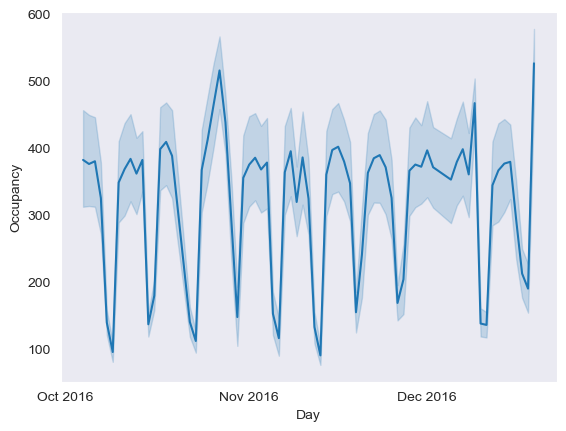

In [14]:
sns.lineplot(x=park.Day, y=park.Occupancy)
plt.xticks(months)

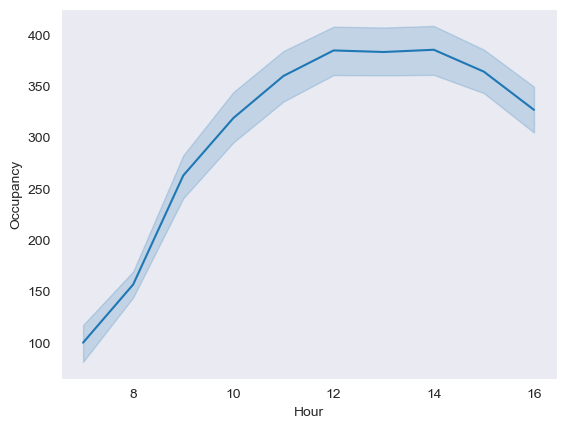

In [15]:
sns.lineplot(x=park.Hour, y=park.Occupancy);

<Axes: xlabel='Hour', ylabel='Occupancy'>

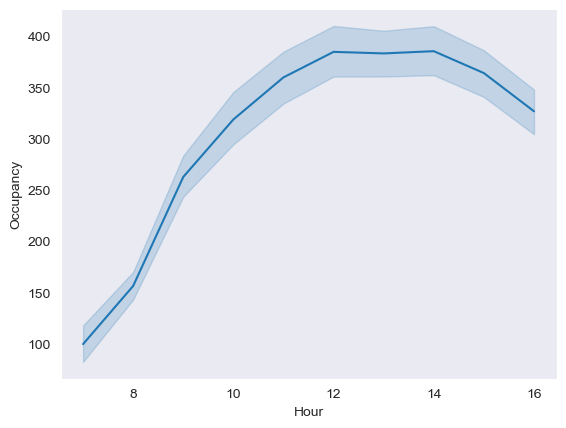

In [16]:
sns.lineplot(x="Hour", y="Occupancy", data=park)

### Bootstraping

<Axes: xlabel='Hour', ylabel='Occupancy'>

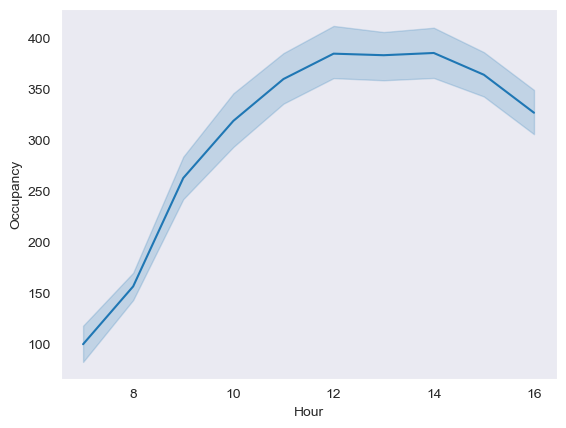

In [22]:
sns.lineplot(x="Hour", y="Occupancy", data=park,
            n_boot=1000)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4212\3056347028.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(x="Hour", y="Occupancy", data=park,


<Axes: xlabel='Hour', ylabel='Occupancy'>

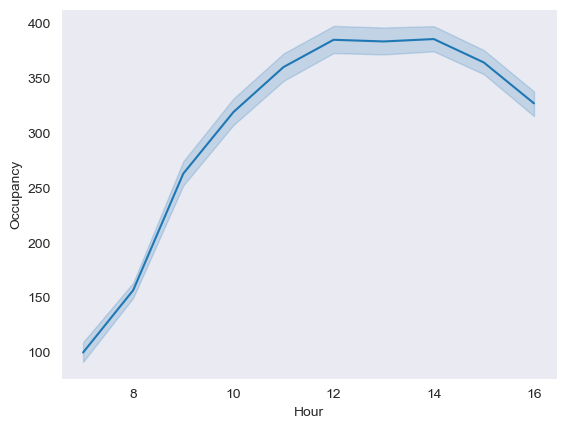

In [25]:
sns.lineplot(x="Hour", y="Occupancy", data=park,
            ci=68)

C:\Users\Dell\AppData\Local\Temp\ipykernel_4212\1902399487.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Hour", y="Occupancy", data=park,


<Axes: xlabel='Hour', ylabel='Occupancy'>

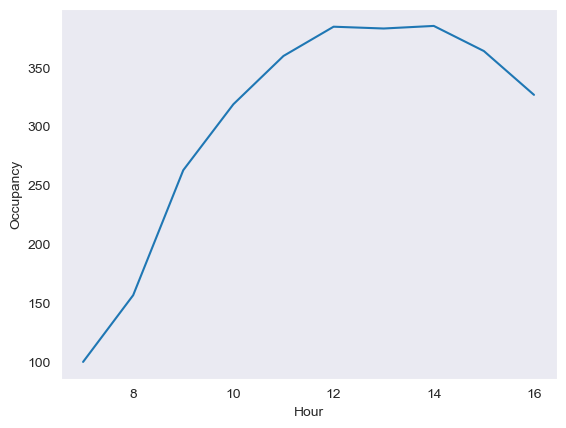

In [28]:
sns.lineplot(x="Hour", y="Occupancy", data=park,
            ci=None)

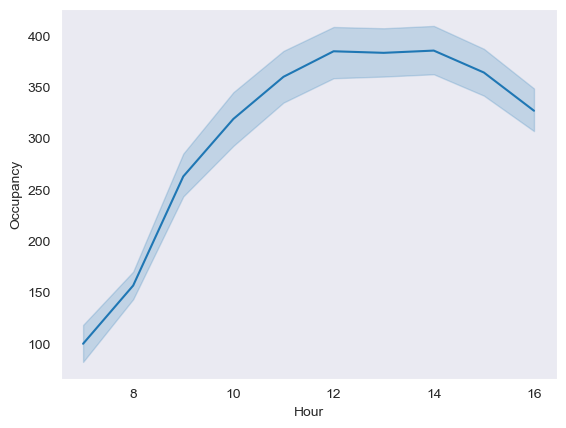

In [30]:
sns.lineplot(x="Hour", y="Occupancy", data=park,
            estimator="mean"
            );

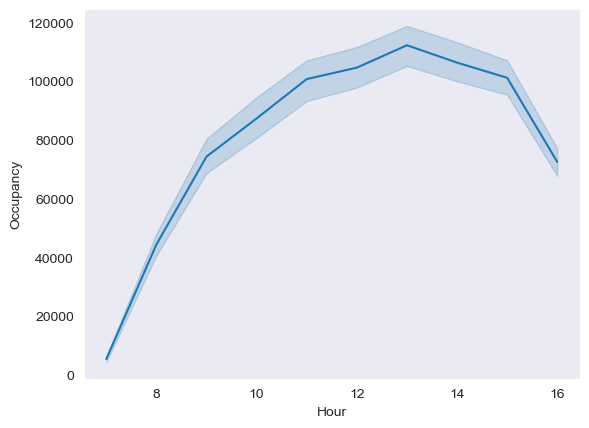

In [31]:
sns.lineplot(x="Hour", y="Occupancy", data=park,
            estimator="sum"
            );

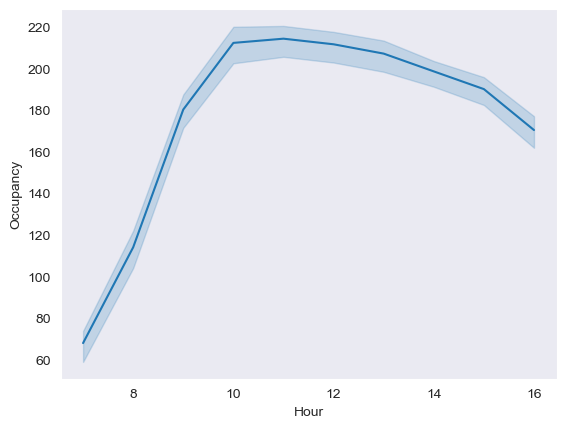

In [35]:
sns.lineplot(x="Hour", y="Occupancy", data=park,
            estimator="std"
            );

### Visual Semantics

#### hue

([<matplotlib.axis.XTick at 0x19c883806d0>,
 [Text(17075.0, 0, 'Oct 2016'),
  Text(17106.0, 0, 'Nov 2016'),
  Text(17136.0, 0, 'Dec 2016')])

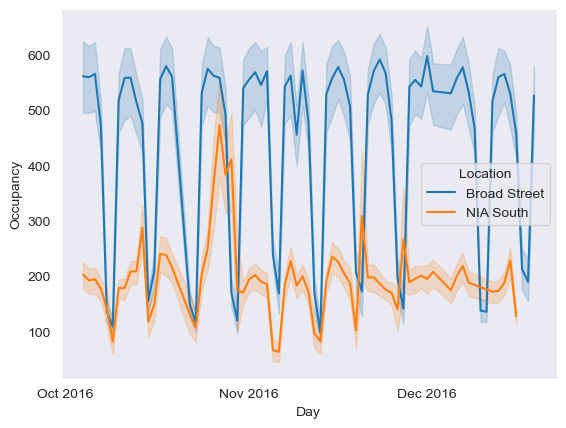

In [37]:
sns.lineplot(x="Day", y="Occupancy", data=park
            , hue="Location")
plt.xticks(months)

<Axes: xlabel='Day', ylabel='Occupancy'>

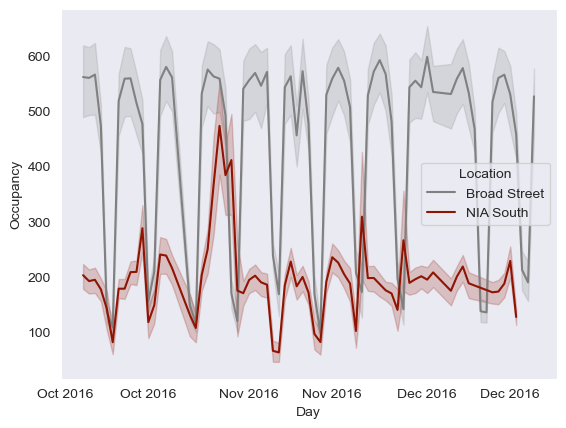

In [39]:
sns.lineplot(x="Day", y="Occupancy", data=park,
            hue="Location",
            palette=["gray", "xkcd:brick red"])

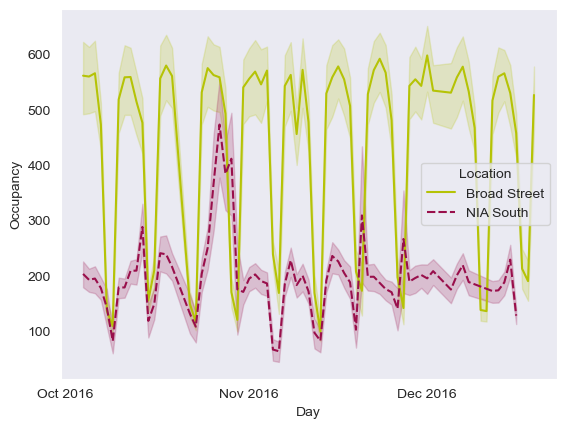

In [43]:
sns.lineplot(x="Day", y="Occupancy", data=park,
             hue="Location",
            style="Location",
            palette=["xkcd:bile", "xkcd:berry"])
plt.xticks(months);

### Size

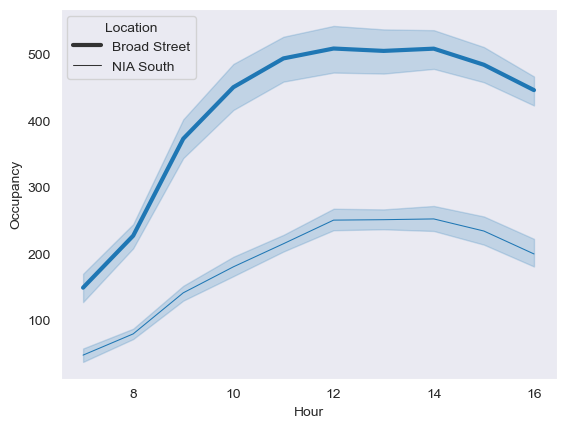

In [44]:
sns.lineplot(x="Hour", y="Occupancy", data=park,
             size="Location"
            );

C:\Users\Dell\AppData\Local\Temp\ipykernel_4212\123740075.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Hour", y="Occupancy", data=park,


<Axes: xlabel='Hour', ylabel='Occupancy'>

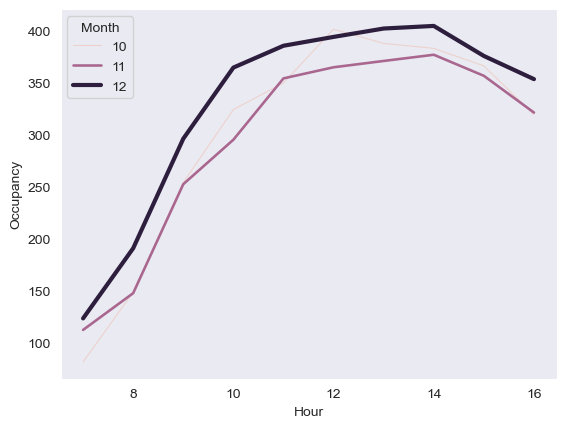

In [47]:
sns.lineplot(x="Hour", y="Occupancy", data=park,
            ci=None, 
             hue="Month",
            size="Month")

### Style

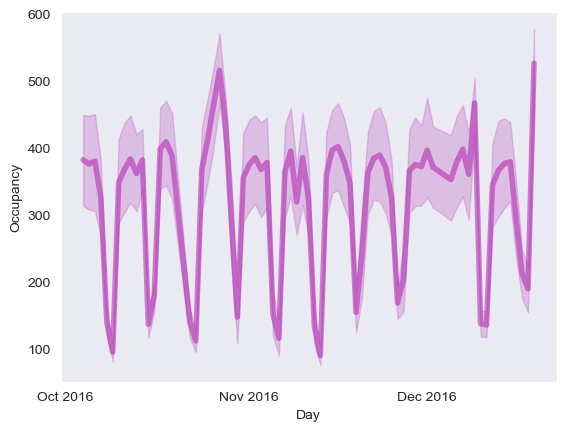

In [51]:
sns.lineplot(x="Day", y="Occupancy", data=park,
            lw=4,
            color="#aa11aa",
            alpha=0.5
            )

plt.xticks(months);